# Intro to NumPy

We're going to meet the NumPy library for maths, numerics, ndarrays, linear algebra, and more.

In [2]:
import numpy as np

Let's load a bit of data. NumPy provides a convenient way to load data from a URL. 

In [7]:
ds = np.DataSource('../data/')

f = ds.open('https://geocomp.s3.amazonaws.com/data/GR-NPHI-RHOB-DT.npy', mode='rb')

data = np.load(f)  # f could also just be a local filename.

dt = data[:, -1]

In [8]:
dt.shape

(71,)

In [9]:
dt[30]

78.26930000272084

In [10]:
dt[30:40]

array([78.2693    , 78.8674    , 80.2621    , 78.1063    , 78.9166    ,
       78.1695    , 78.44      , 79.0334    , 76.98660001, 80.0743    ])

These are NumPy arrays, which we'll meet properly in a minute. For now, just notice that they look a lot like lists... which might mean that even 'naive' functions that were written for scalar quantities (i.e. not for sequences) work on them.

In [12]:
def vp_from_dt(dt):
    return 1e6 / dt

vp_from_dt(dt/0.3048)

array([3693.19799659, 3730.70388886, 3675.62822147, 3726.34358651,
       3758.25354638, 3696.18073454, 3607.42931629, 3684.71062684,
       3678.12541085, 3535.17545983, 3541.32004803, 3542.49306423,
       3712.37837027, 3827.35706421, 3842.49308177, 3697.08636112,
       3674.91029743, 3824.90277739, 3850.38573334, 3808.80022796,
       3869.13980179, 3830.30059314, 3850.70678409, 3842.64809897,
       3885.83696567, 3800.93477063, 3821.36857149, 3856.63637537,
       3868.3197557 , 3872.90567032, 3894.24716957, 3864.7146982 ,
       3797.55824988, 3902.37407209, 3862.30526925, 3899.21900492,
       3885.77256501, 3856.59733733, 3959.13054973, 3806.46474594,
       3756.12773794, 3640.62884489, 3823.89987612, 3790.51674394,
       3797.19869392, 3787.31398921, 3865.04794546, 3941.28927231,
       3866.68561106, 3874.46135048, 3865.709709  , 3834.2709351 ,
       3999.79528586, 3841.1856258 , 3890.95620754, 3940.76951038,
       3877.44821156, 4002.09033078, 3839.99032451, 3954.82571

Our functions do work on them!

## What is NumPy?

NumPy provides two fundametal objects: an _n_-dimensional array object (`ndarray`) and a universal function object (`ufunc`). The `ndarray` is a data structure, and the `ufunc` is a protocol for performing very fast elementwise operations on those data structures. 

As we have seen, NumPy's `ndarray` data structures are a lot like lists. As we'll see, however, they have a big advantage over lists.

We instantiate an `ndarray` with a list, or any sequence:

In [14]:
a = np.array([1, 2, 3, 4, 5])

In [15]:
a.append(6)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

OK, so they're not exactly like lists. Indeed, there's one very big difference. 

Recall that trying to multiply a list doesn't do what you want it to do:

In [16]:
b = [1, 2, 3, 4, 5]
print(10 * b)

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


Instead, to multiply the numbers in a list by 10, we have to do something like this:

In [17]:
[10 * n for n in b]

[10, 20, 30, 40, 50]

But NumPy has a superpower: ufunc. What the heck is ufunc? It doesn't really matter, the point is what it enables: elementwise arithmetic. 

In [18]:
a

array([1, 2, 3, 4, 5])

In [20]:
1000 * a

array([1000, 2000, 3000, 4000, 5000])

Specifically an N-dimensional array is a homogenous collection of 'items' indexed using N integers. With a 1-D array, you can index into a single element using 1 integer, with a 2-D array you need two integers, etc. 

This proves to be A Very Powerful Thing.

NumPy contains lots of other tools, including convolution, interpolation, and linear algebra operators, but most of what we do with it every day revolves around the `ndarray`, so we're going to spend a bit of time getting to know them.

## The `ndarray`

There are two essential pieces of information that define an _n_-dimensional array. The shape of the array, and the kind of item that the array is composed of:

### shape

    >>> a = np.arange(5)
    >>> a.shape
    (5,)

is an `tuple` of _n_ integers (one for each dimension) that provides information about how far the index can vary in that dimension. 

### dtype

    >>> a.dtype
    dtype('int64')

Because the `ndarray` is a homogeneous collection of exactly the same data type, NumPy code can be very fast.

## Array creation

There are plenty [array creation functions](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) in NumPy allowing you to generate data from scratch, or from existing data. 

- `np.ones`, `np.zeros`, `np.ones_like`

- `np.arange`, `np.linspace`

- `np.random` module

Let's look at a few of them:

In [ ]:
np.ones(10), np.zeros(10), np.ones_like([2, 4, 6, 8])

In [36]:
# start with...
np.ones((3,5), dtype='int16')  
np.ones((3,5)).dtype

# then try...
np.ones((3,5), dtype='int16') + 2**16

array([[65537, 65537, 65537, 65537, 65537],
       [65537, 65537, 65537, 65537, 65537],
       [65537, 65537, 65537, 65537, 65537]], dtype=int32)

In [37]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

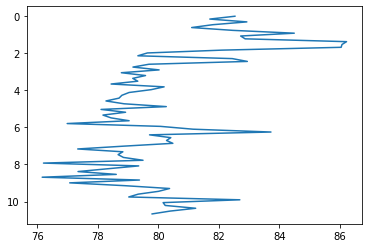

In [14]:
import matplotlib.pyplot as plt

dz = 0.1524
md = np.arange(0, dz*dt.size, dz)

fig, ax = plt.subplots()
ax.plot(dt, md)
ax.invert_yaxis()

In [52]:
np.ones(10) * np.pi

array([3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265])

In [55]:
%timeit np.ones((10,10,10))

1.75 µs ± 266 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [56]:
# np.empty can be way faster than ones or zeros because it grabs whatever is in memory

%timeit np.empty((10,10,10))

463 ns ± 6.74 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [57]:
np.arange(0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
np.arange(0, 10, 1).dtype

dtype('int64')

In [62]:
np.linspace(0, 9, 10)

a, step = np.linspace(0, 100, 101, retstep=True)

In [64]:
a

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [65]:
np.logspace(1, 3, 50)

array([  10.        ,   10.98541142,   12.06792641,   13.25711366,
         14.56348478,   15.9985872 ,   17.57510625,   19.30697729,
         21.20950888,   23.29951811,   25.59547923,   28.11768698,
         30.88843596,   33.93221772,   37.2759372 ,   40.94915062,
         44.98432669,   49.41713361,   54.28675439,   59.63623317,
         65.51285569,   71.9685673 ,   79.06043211,   86.85113738,
         95.40954763,  104.81131342,  115.13953993,  126.48552169,
        138.94954944,  152.64179672,  167.68329368,  184.20699693,
        202.35896477,  222.29964825,  244.20530945,  268.26957953,
        294.70517026,  323.74575428,  355.64803062,  390.69399371,
        429.19342601,  471.48663635,  517.94746792,  568.9866029 ,
        625.05519253,  686.648845  ,  754.31200634,  828.64277285,
        910.29817799, 1000.        ])

In [66]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Broadcasting

In [ ]:
np.arange(0, 10) + 1

In [ ]:
np.arange(0, 10) + np.ones(10)

In [ ]:
np.arange(10) + np.arange(0, 110, 10)

## Slicing

In [ ]:
a = np.arange(20).reshape(4,5)
a

In [ ]:
# A column is not a column vector, it's just a 1D array
a[:, 0]

In [ ]:
a[:, 1]

In [ ]:
a.T

In [ ]:
# Setting values in slices
a[:, 2] *= 100
a

## Plotting

In [ ]:
theta = np.arange(0, np.pi, 0.1)
y = np.sin(theta)**2
y

In [ ]:
import matplotlib.pyplot as plt

plt.plot(theta, y, 'r-o')

## Nans

In [ ]:
a = np.nan
a

In [ ]:
# NaN is not a number, so == doesn't work as expected
a == np.nan, np.nan == np.nan

In [ ]:
a is np.nan, np.isnan(a)

## Masking with boolean arrays

In [ ]:
a

In [ ]:
# Boolean arrays
a > 12

In [ ]:
a[a > 12] = np.nan
a

## Indexing with arrays

In [ ]:
a = np.arange(25).reshape(5,5)

In [ ]:
# You can index with sequences... so can get arbitrary items from array.
# Can't do this with lists or other Python sequences.
rows = [0, 3, 4]
a[rows]

## Vector and matrix operations

NumPy chooses the correct 'orientation' for a 1D vector when performing multiplication with a 2D array:

In [69]:
# 2D array multiplied by 1D array
np.ones((4,3)) * np.array([1, 10, 100])

array([[  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  10., 100.]])

In [ ]:
np.array([1, 10, 100]).reshape(-1, 1)

In [ ]:
np.array([1, 10, 100, 1000]).reshape(-1, 1)

In [ ]:
a = np.arange(120)

# minus one syntax says, 'you figure this one out'
a.reshape(-1,6) 

In [ ]:
# 2D array multiplied by 'column vector'
np.ones((4,3)) * np.array([1, 10, 100, 1000]).reshape(-1, 1)

Matrix multiply:

In [70]:
# Can't use ordinary multiply:
np.ones((4, 3)) * np.ones((3,2))

ValueError: operands could not be broadcast together with shapes (4,3) (3,2) 

In [71]:
np.ones((4, 3)) @ np.ones((3, 2))

array([[3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.]])

No need to 'orientate' when performing the dot (inner or scalar) product between two vectors:

In [72]:
np.array([1, 10, 100]) @ np.array([1, 10, 100])

10101

In [76]:
# Matrix multiply with a vector 'just works' although you might think it shouldn't.
np.ones((4,3)) @ np.array([1, 10, 100])

array([111., 111., 111., 111.])

In [78]:
# Matrix multiply with a column vector
np.ones((4,3)) @ np.array([1, 10, 100]).reshape((3,1))

array([[111.],
       [111.],
       [111.],
       [111.]])

In [80]:
# Another way to make column vector, equivalent to reshape(-1, 1)
np.array([1, 10, 100])[:, None]

array([[  1],
       [ 10],
       [100]])

In [79]:
# YET ANOTHER way to make column vector, equivalent to reshape(-1, 1)
np.array([1, 10, 100])[:, np.newaxis]

array([[  1],
       [ 10],
       [100]])

In [81]:
# Norm of a vector.
np.linalg.norm([3, 4])

5.0

In [ ]:
# Distance between two points.
p = np.array([3, 4])
q = np.array([6, 8])
np.linalg.norm(p - q)

Solve a linear system of equations:

$$ 3x + y/2 = 9.5 $$
$$ x - 2y = -12$$

Let's solve $\mathrm{G}\mathrm{m} = \mathrm{d}$ with the closed-form solution, first via the standard equation...

In [92]:
G = np.array([[3, 0.5], [1, -2]])
d = np.array([9.5, -12])

m_est = G.T @ np.linalg.inv(G @ G.T) @ d

m_est

array([2., 7.])

And with NumPy's least squares solver:

In [93]:
# Solve a system of equations by least squares.
m, residuals, rank, sv = np.linalg.lstsq(G, d)

/home/matt/anaconda3/envs/geocomp/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [83]:
m

array([2., 7.])

## Random variables

In [ ]:
np.random.random((3, 5))

Draw porosities from a normal distribution.

In [ ]:
np.random.normal(loc=20, scale=3, size=10)

In [ ]:
np.random.randint(low=1000, high=2000, size=5)

### Exercise

Can you make and then plot 20 noisy pertubations of the `dt` log we loaded earlier, given a standard deviation of 2.5 microseconds per metre?

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Use a function from the np.random module to make an
# array with shape (20, s), where s is the size of dt.
noise = 

# Then add it to dt to make dt_noisy.
dt_noisy = 

In [19]:
noise = np.random.normal(loc=0, scale=2.5, size=(20, dt.size))
dt_noisy = dt + noise

Use this code to plot your result:

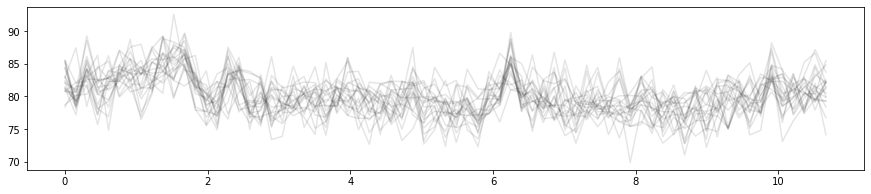

In [20]:
md = np.arange(0, dz*dt.size, dz)

plt.figure(figsize=(15, 3))
_ = plt.plot(md, dt_noisy.T, color='k', alpha=0.1)

In [ ]:
plt.imshow(dt_noisy.T, aspect=0.3)

In [ ]:
# To read x's and y's from a map, you need an array of x's and an array of y's:
a[[2,3], [1, 3]]  # gets (2, 1) and (3, 3)

In [ ]:
# To get x's and y's from a list of (x, y):
xy = np.array([[2, 1], [3, 3], [0, 4]])
xy

### Exercise

Can you use simultaneous assignment and the matrix transpose operation to get separate arrays for `x` and `y`?

In [ ]:
x, y = xy.T

a[x, y]

### Exercise

Make a 2D velocity model of shape (120, 100) with 3 equal-thickness layers:

- 1486 m/s
- 2000 m/s
- 2400 m/s

Plot the result with `plt.imshow`.

In [ ]:
d, w = 120, 100
vel = np.ones((d, w)) * 1486

# Watch out for the Obiwan error.
vel[1 + d//3:1 + 2*d//3] = 2000
vel[1 - d//3:] = 2400

_ = plt.imshow(vel)

Try giving this array to your `rc_series()` function. Plot the result with `imshow`.

In [ ]:
from utils import rc_vector
rc = rc_vector(vel)
plt.imshow(rc)

In [ ]:
from bruges.filters import ricker
w = ricker(0.1, 0.002, 25)
plt.plot(w)

In [ ]:
def convolve_one_trace(tr):
    return np.convolve(tr, w, mode='same')

syn = np.apply_along_axis(convolve_one_trace, axis=0, arr=rc)

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(vel)
axs[1].imshow(syn)

## Fancy indexing

In [ ]:
c = np.random.randint(3, size=(5,5))
c

In [ ]:
d = np.array([111,222,333])
d

In [ ]:
d[c]

----

### INTRO STUDENTS TURN BACK NOW

## Broadcasting example

Broadcasting is a powerful idea. Here's a function to plot a waveform:

In [ ]:
def wave(f):
    t = np.linspace(0, 1, 100)
    return np.sin(2 * np.pi * f * t)

We can of course pass a scalar for `f`:

In [ ]:
import matplotlib.pyplot as plt

f = 20
plt.plot(wave(f))

But with a small modification, we can allow the function to accept vectors for `f` too:

In [ ]:
def wave(f):
    f = np.asanyarray(f).reshape(-1, 1)
    t = np.linspace(0, 1, 100)
    return np.squeeze(np.sin(2 * np.pi * f * t))

In [ ]:
f = range(1, 31)
plt.imshow(wave(f))

Our library `bruges` implements most of its functions this way. So, for example, you can pass a range of frequencies to the Ricker-wavelet-generating function `ricker()`:

In [ ]:
import bruges

plt.imshow(bruges.filters.ricker(0.2, 0.001, range(40)))

## Array manipulation

There are a number of [array manipulation](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) routines in NumPy. The ones we use the most are:

#### Changing shape

- `np.reshape(a, newshape)`
- `np.flatten(a)` 

#### Transpose-like operations

- `np.transpose(a[, axes)` &mdash; same as `a.T`
- `np.moveaxis(a, source, destination)`
- `np.rollaxis(a, axis[, start])`
- `np.swapaxes(a, axis1, axis2)`
- `np.flatten(a)`

#### Change the number of dimensions

- `a[:, None]` &mdash; treats an array as if it has the new dimension already, effectively adding it
- `np.reshape(a, newshape)` &mdash; where newshape contains a new dimension of size 1
- `np.expand_dims(a, axis)` &mdash; adds dimensions
- `np.squeeze(a[, axis)` &mdash; removes dimensions
- `np.atleast_1d(*arys)`, `np.atleast_2d(*arys)`, `np.atleast_3d(*arys)` &mdash; treats arys as if they have at least the specified number of dimensions

#### Joining arrays

- `np.concatenate((a1, a2, ...)[, axis, out])` – join a sequence of arrays along an existing axis
- `np.stack(arrays[, axis, out])` – join a sequence of arrays along a new axis.
- `np.hstack(tup)` – stack arrays in sequence horizontally (column-wise).
- `np.vstack(tup)` – stack arrays in sequence vertically (row-wise).
- `np.block(arrays)` – assemble an `ndarray` from nested lists of blocks.

#### Spltting arrays

- `np.spilt(arr, indices_or_sections[, axis])`

#### Tiling arrays

- `np.tile(A, reps)` – construct an array by repeating A the number of times given by reps
- `np.repeat(a, repeat[, axis])` - repeat elements of an array

#### Rearraging elements

- `np.flip(m[, axis])` – reverse the order of elements in an array along the give axis
- `np.fliplr(m)` – flip an array in the left-right direction.
- `np.flipud(m)` – flip the array in the up-down direction
- `np.reshape(a, newshape[, order])` – gives a new shape to an array without changing it's data
- `np.roll(a, shift[, axis])` - roll array elements along a given axis

#### Adding and removing elements

- `np.trim_zeros(filt[,trim])` – Trim the leading and/or trailing zeros from a 1-D array or sequence.
- `np.unique(ar[, return_index, return_inverse, ...])` – Find the unique elements of an array

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2021</p>
</div>